<a href="https://colab.research.google.com/github/2206081MuhamadHamzah/UTS-PengolahanCItra2024/blob/main/tugasPengolahanCitra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Soal 1: Jenis-Jenis Tepi**

Pertanyaan:

1. Jelaskan empat jenis tepi yang biasa ditemukan dalam citra digital.
2. Berikan contoh masing-masing jenis tepi dalam kehidupan sehari-hari.
3. Mengapa tepi dengan derau memerlukan pendekatan khusus untuk pendeteksiannya?

Tujuan: Memahami jenis tepi dan tantangan pendeteksian pada citra yang mengandung derau.

**Jenis-Jenis Tepi dalam Citra Digital**

Tepi dalam citra digital mengacu pada perubahan intensitas piksel yang signifikan, yang sering menunjukkan batas-batas objek. Berikut adalah empat jenis tepi yang umum ditemukan:



1.   **Step Edge**
    
    Definisi: Perubahan intensitas yang tiba-tiba antara dua wilayah citra, seperti perbedaan warna atau kecerahan.

Contoh:
* Batas antara dinding berwarna putih dan pintu yang gelap.
* Horizon antara langit dan laut.
Karakteristik:
Intensitas berubah secara mendadak dari satu nilai konstan ke nilai lainnya.
2.   **Ramp Edge**

 Definisi: Perubahan intensitas yang bertahap antara dua wilayah, biasanya karena efek pencahayaan atau transisi objek.

Contoh:
* Bayangan yang memudar pada permukaan meja.
* Transisi gradasi cahaya pada lampu redup.

Karakteristik:
Intensitas berubah secara perlahan, menghasilkan gradien lembut.

3.  **Line Edge**
    
    Definisi: Perubahan intensitas yang terjadi sepanjang sebuah garis, di mana intensitas lebih rendah atau lebih tinggi di tengah dibandingkan sekitarnya.

Contoh:
* Kabel hitam pada dinding putih.
* Garis zebra cross pada jalan.

Karakteristik:
Tepi terlihat sebagai garis tipis yang mencolok dibandingkan latar belakang.

4.  **Roof Edge**

     Definisi: Perubahan intensitas yang menyerupai bentuk atap, dengan puncak intensitas tinggi di tengah yang diapit oleh intensitas yang menurun di kedua sisi.

Contoh:
* Refleksi cahaya pada permukaan kaca.
* Highlight di tengah permukaan benda metalik.

Karakteristik:
Perubahan intensitas berbentuk segitiga, lebih tajam daripada ramp edge.

**Mengapa Tepi dengan Derau Membutuhkan Pendekatan Khusus?**
1. Pengaruh Derau:
  * Derau seperti "salt-and-pepper" menambahkan fluktuasi acak pada intensitas piksel. Ini dapat mengaburkan tepi yang sebenarnya atau menghasilkan tepi palsu.

2. Kesulitan dalam Deteksi:
  * Algoritma pendeteksian tepi sederhana mungkin mendeteksi derau sebagai tepi karena perubahan intensitasnya yang mendadak.
  * Tepi menjadi sulit diidentifikasi karena derau membuat gradien tidak teratur
3. Pendekatan Khusus:
  * Smoothing (Filtering): Menggunakan filter seperti Gaussian untuk mengurangi derau sebelum pendeteksian tepi.
  * Threshold Adaptif: Menggunakan ambang batas yang disesuaikan untuk membedakan tepi nyata dari tepi yang diakibatkan derau.
  * Metode Robust: Pendekatan seperti deteksi Canny menggunakan pemrosesan gradien dan non-maximum suppression untuk mengurangi sensitivitas terhadap derau.


# **Soal 2: Pendeteksian Tepi Menggunakan Operator Gradien**

Pertanyaan:

1. Operator Sobel dan Prewitt digunakan untuk pendeteksian tepi. Pilih salah satu operator tersebut.
2. Implementasikan kode Python menggunakan pustaka seperti NumPy atau OpenCV untuk mendeteksi tepi dalam sebuah citra.
3. Jelaskan langkah-langkah implementasi secara rinci.

Tujuan: Mengasah keterampilan praktis dalam penerapan algoritma pendeteksian tepi.

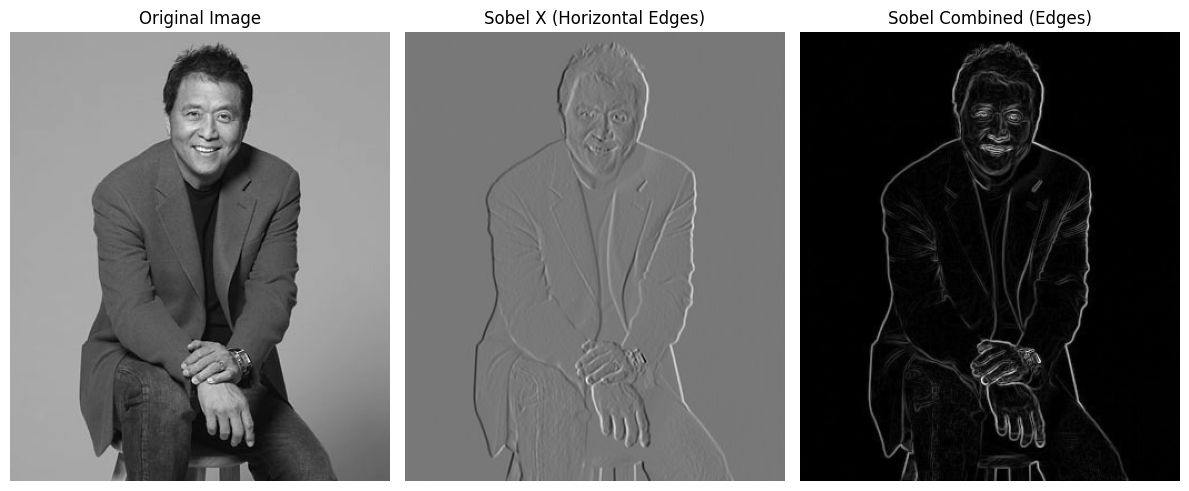

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca Citra
image = cv2.imread('Kiyosaki-9.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Terapkan Operator Sobel
# Gradien horizontal (Gx)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)

# Gradien vertikal (Gy)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Kombinasikan gradien
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Normalisasi untuk visualisasi
sobel_combined = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# 3. Visualisasi
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X (Horizontal Edges)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined (Edges)')
plt.axis('off')

plt.tight_layout()
plt.show()


**Penjelasan Kode**

1. Penggunaan cv2.Sobel:
  * cv2.Sobel(image, cv2.CV_64F, dx, dy, ksize)
  * image: Citra input (grayscale).
  * cv2.CV_64F: Format data untuk hasil gradien.
  * dx dan dy: Derivatif pertama pada sumbu
𝑥 dan 𝑦
  * ksize: Ukuran kernel Sobel (umumnya 3 atau 5).
2. Gabungan Gradien:
  * cv2.magnitude menghitung magnitude gradien menggunakan formula
3. Normalisasi:
  * cv2.normalize digunakan untuk mengonversi nilai piksel gradien ke rentang 0–255 untuk visualisasi yang lebih baik.
4. Visualisasi:
  * Matplotlib digunakan untuk menampilkan hasil citra asli, gradien horizontal, dan gradien gabungan.

**Langkah-Langkah Implementasi**
1. Impor Pustaka
  *Gunakan pustaka seperti OpenCV untuk memproses citra dan NumPy untuk manipulasi data.
2. Baca Citra
  * Baca citra dalam skala keabuan (grayscale) untuk mempermudah operasi gradien.
3. Terapkan Operator Sobel
  * Sobel adalah operator gradien berbasis kernel. Gunakan dua kernel:

* 𝐺𝑥 untuk pendeteksian tepi horizontal.
* 𝐺𝑦 untuk pendeteksian tepi vertikal.
* Gabungkan gradien menggunakan formula
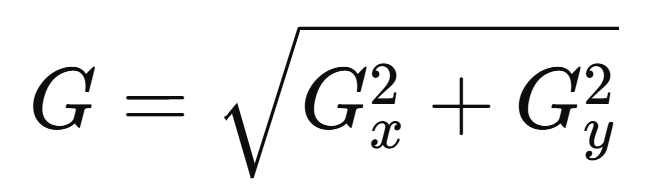

4. Tampilkan Hasil

* Visualisasikan hasil dengan plot citra menggunakan Matplotlib.

# **Soal 3: Perbandingan Operator Pendeteksi Tepi**

Pertanyaan:

1.Berikan perbandingan antara operator Sobel, Prewitt, dan Canny berdasarkan:
* Akurasi pendeteksian
* Kompleksitas komputasi
2. Dalam situasi apa operator Canny lebih direkomendasikan dibanding operator lainnya?

Tujuan: Mengevaluasi kelebihan dan kekurangan berbagai metode pendeteksian tepi.

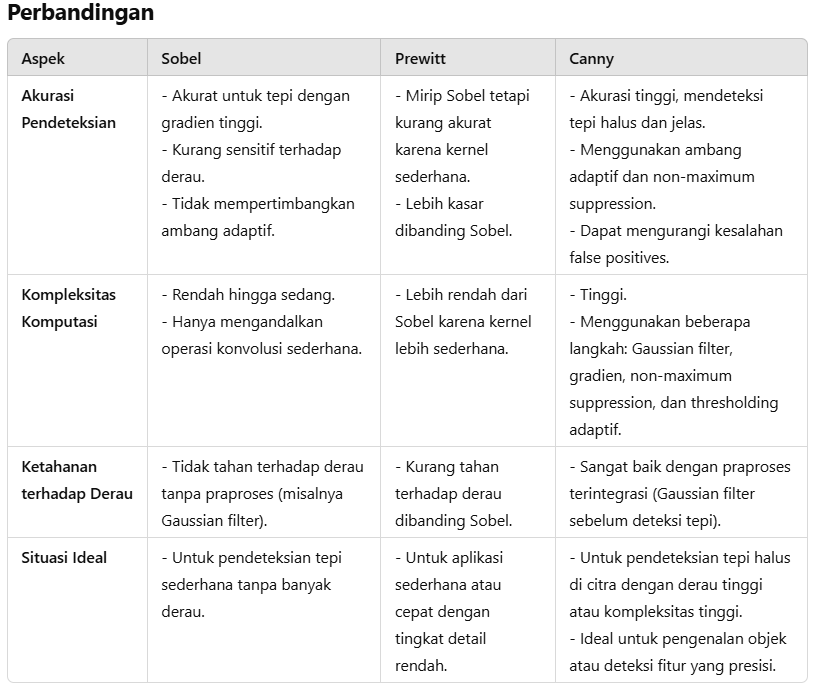


**Keunggulan dan Kekurangan**
1. Sobel
* Keunggulan:
  * Kernel lebih kompleks daripada Prewitt, menghasilkan deteksi tepi yang lebih halus.
  * Cocok untuk analisis gradien dasar (arah vertikal atau horizontal).
* Kekurangan:
  * Tidak mendeteksi tepi dengan presisi tinggi.
  * Rentan terhadap derau jika tidak diiringi dengan smoothing (filter Gaussian).
2. Prewitt
* Keunggulan:
  * Operasi komputasi sederhana dan lebih cepat daripada Sobel.
  * Memadai untuk aplikasi di mana waktu komputasi lebih penting dibanding akurasi.
* Kekurangan:
  * Deteksi tepi kasar.
  * Tidak cocok untuk gambar kompleks atau dengan derau tinggi.
3. Canny
* Keunggulan:
  * Akurasi sangat tinggi.
  * Menggabungkan langkah-langkah smoothing, pendeteksian gradien, dan thresholding.
  * Mengurangi deteksi tepi palsu (false positives).
* Kekurangan:
  Kompleksitas komputasi tinggi.
  Membutuhkan parameter yang lebih banyak (misalnya ambang batas atas dan bawah) yang perlu diatur dengan hati-hati.

**Kapan Canny Direkomendasikan?**
1. Ketika Akurasi Sangat Penting:
  * Citra dengan detail kompleks (misalnya gambar medis atau citra satelit).
  * Aplikasi yang membutuhkan tepi yang halus dan lengkap (pengenalan wajah atau objek).
2. Citra dengan Derau Tinggi:

  * Praproses Gaussian filter pada metode Canny membantu meminimalkan pengaruh derau.
3. Kebutuhan Pengurangan False Positives:

  * Metode non-maximum suppression dan threshold adaptif memastikan deteksi yang lebih presisi.

  **Kesimpulan**
* Gunakan Sobel atau Prewitt untuk aplikasi sederhana dengan waktu komputasi rendah.
* Pilih Canny jika akurasi sangat penting, terutama pada gambar kompleks dengan derau.
* Kombinasi smoothing (misalnya Gaussian filter) dan operator sederhana dapat mendekati hasil Canny dengan lebih cepat jika sumber daya terbatas.

# **Soal 4: Pendeteksian Tepi pada Citra Noisy**
Pertanyaan:

1. Sebuah citra memiliki derau "salt-and-pepper". Lakukan langkah berikut:
  * Terapkan Gaussian filter untuk mengurangi derau.
  * Gunakan metode Sobel dan Canny untuk mendeteksi tepi.
2. Bandingkan hasil pendeteksian dari kedua metode dengan citra asli.
3. Berikan analisis hasil yang diperoleh.

Tujuan: Memahami pentingnya praproses data (filtering) sebelum pendeteksian tepi dan menganalisis hasilnya.

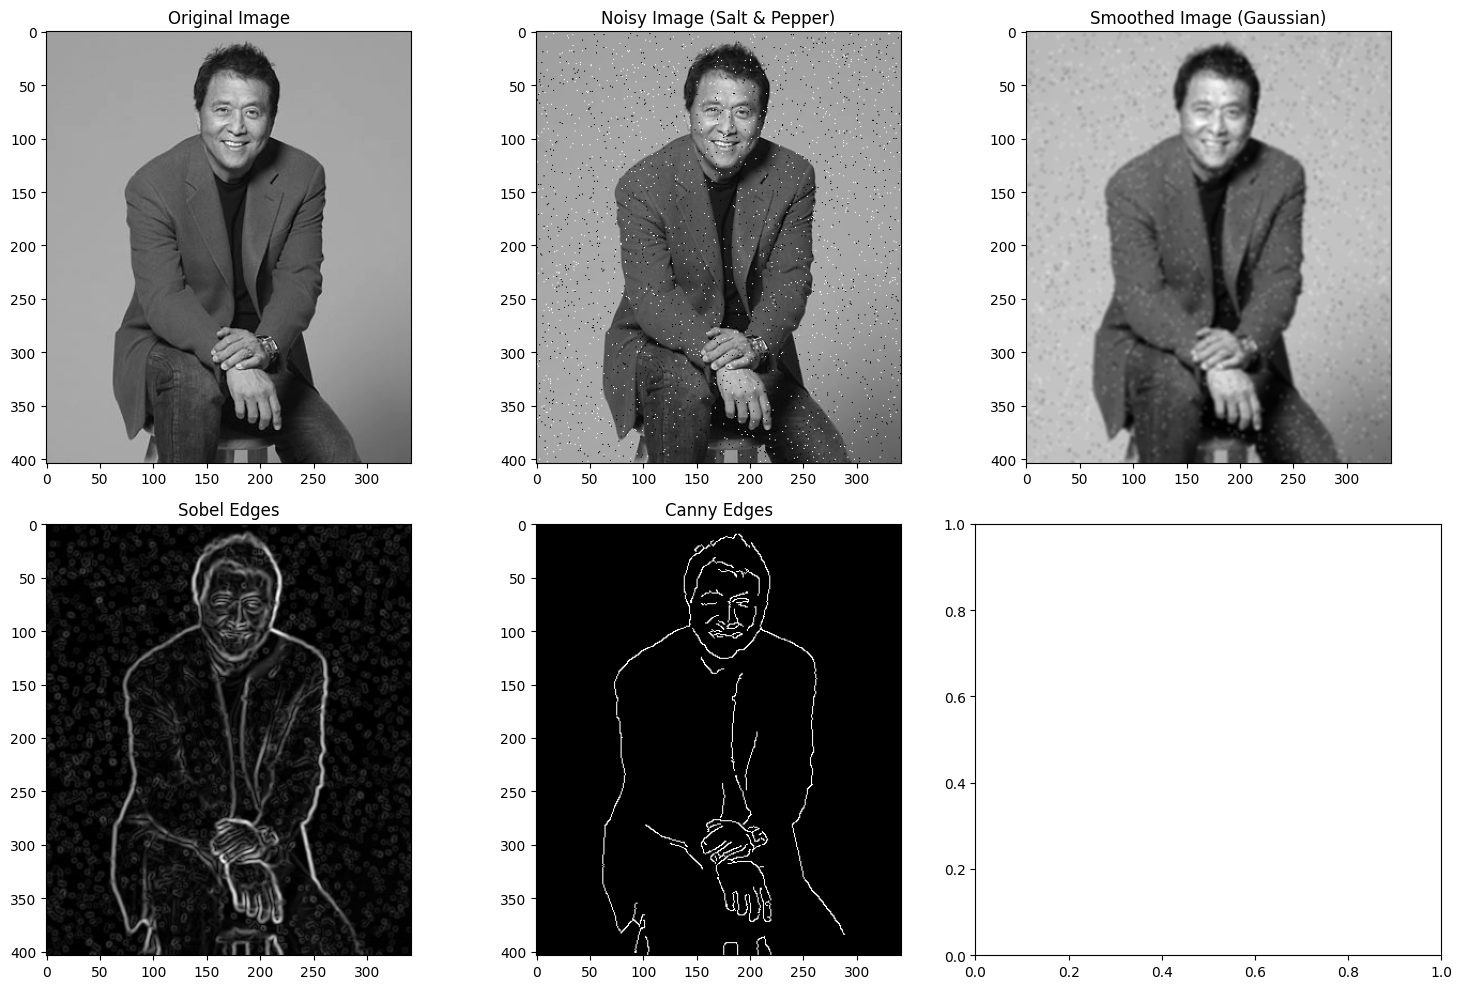

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca citra asli
original_img = cv2.imread('Kiyosaki-9.jpg', cv2.IMREAD_GRAYSCALE)  # Ganti dengan path citra Anda

# 2. Tambahkan derau salt-and-pepper (simulasi)
noisy_img = original_img.copy()
rows, cols = noisy_img.shape
salt_pepper_ratio = 0.02
num_salt = np.ceil(salt_pepper_ratio * rows * cols * 0.5).astype(int)
num_pepper = np.ceil(salt_pepper_ratio * rows * cols * 0.5).astype(int)

# Salt
coords = [np.random.randint(0, i - 1, num_salt) for i in noisy_img.shape]
noisy_img[coords[0], coords[1]] = 255

# Pepper
coords = [np.random.randint(0, i - 1, num_pepper) for i in noisy_img.shape]
noisy_img[coords[0], coords[1]] = 0

# 3. Terapkan Gaussian filter
smoothed_img = cv2.GaussianBlur(noisy_img, (5, 5), 1.5)

# 4. Deteksi tepi dengan Sobel
sobel_x = cv2.Sobel(smoothed_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(smoothed_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# 5. Deteksi tepi dengan Canny
canny_edges = cv2.Canny(smoothed_img, 100, 200)

# 6. Tampilkan hasil
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 0].imshow(original_img, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 1].imshow(noisy_img, cmap='gray')
ax[0, 1].set_title('Noisy Image (Salt & Pepper)')
ax[0, 2].imshow(smoothed_img, cmap='gray')
ax[0, 2].set_title('Smoothed Image (Gaussian)')
ax[1, 0].imshow(sobel_edges, cmap='gray')
ax[1, 0].set_title('Sobel Edges')
ax[1, 1].imshow(canny_edges, cmap='gray')
ax[1, 1].set_title('Canny Edges')
plt.tight_layout()
plt.show()


# **Analisis Hasil**
1. Tanpa Gaussian Filter:
  * Sobel dan Canny menghasilkan tepi yang sangat terganggu oleh derau "salt-and-pepper".
  * Derau menyebabkan deteksi tepi palsu, sehingga sulit untuk membedakan fitur tepi yang sebenarnya.
2. Dengan Gaussian Filter:

  * Gaussian filter membantu menghaluskan citra, sehingga derau berkurang.
  * **Sobel:** Deteksi tepi sederhana tetapi cenderung kurang presisi, terutama untuk detail kecil. Cocok untuk citra dengan gradien intensitas yang besar.
  * **Canny:** Menghasilkan tepi yang lebih halus dan akurat karena langkah tambahan seperti non-maximum suppression. Hasil lebih sesuai untuk aplikasi yang membutuhkan tepi presisi tinggi.
3. Kesimpulan:
  * Gaussian filter sangat penting untuk mengurangi pengaruh derau sebelum pendeteksian tepi.
  * Sobel cocok untuk analisis gradien kasar dengan kebutuhan komputasi lebih rendah.
  * Canny adalah pilihan utama untuk deteksi tepi yang halus dan presisi, terutama pada citra dengan banyak derau.